In [1]:
! pip install nltk
! pip install wordcloud

In [2]:
# General Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP Packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modelling Packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [3]:
pwd

'C:\\Users\\HP'

In [4]:
cd/Users/HP/Desktop/Data Science/Project

C:\Users\HP\Desktop\Data Science\Project


In [5]:
amazon_reviews = pd.read_csv('Customer_Reviews.csv')
amazon_reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
amazon_reviews.shape

(10000, 9)

In [7]:
amazon_reviews['Text']

0       I have bought several of the Vitality canned d...
1       Product arrived labeled as Jumbo Salted Peanut...
2       This is a confection that has been around a fe...
3       If you are looking for the secret ingredient i...
4       Great taffy at a great price.  There was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    Like the bad reviews say, the organic formula ...
9997    I wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    We have a 7 week old... He had gas and constip...
Name: Text, Length: 10000, dtype: object

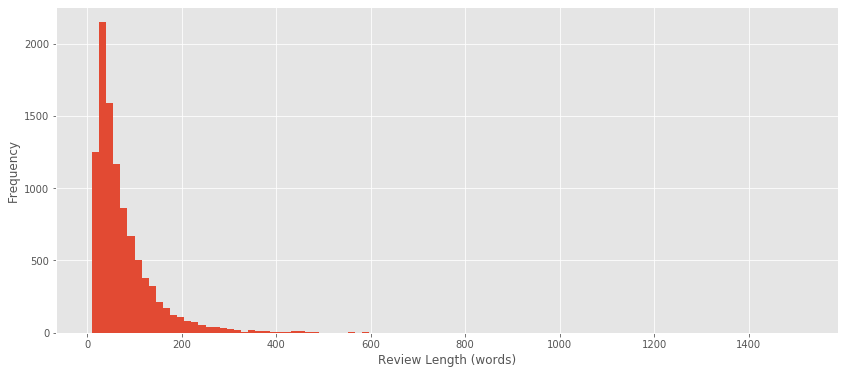

In [8]:
# Getting the number of words by splitting them by a space and present on a histogram with 100 bins
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()
# So majority revies have less than 200 words its mean 77.9 words and the data is positively skewed i.e 4.6

In [9]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 77.9028
Skewness: 4.612459483340116


In [10]:
len(amazon_reviews)

10000

In [11]:
amazon_reviews['Score'].value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

In [12]:
percent_val = 100 * amazon_reviews['Score'].value_counts()/len(amazon_reviews)
percent_val

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

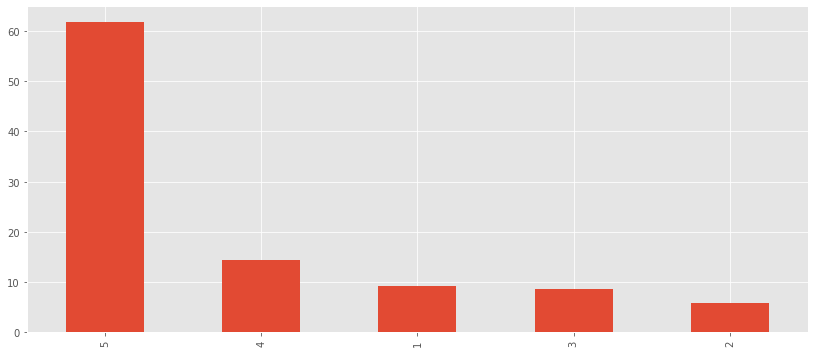

In [13]:
percent_val.plot.bar()
plt.show()

### WordCloud - A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

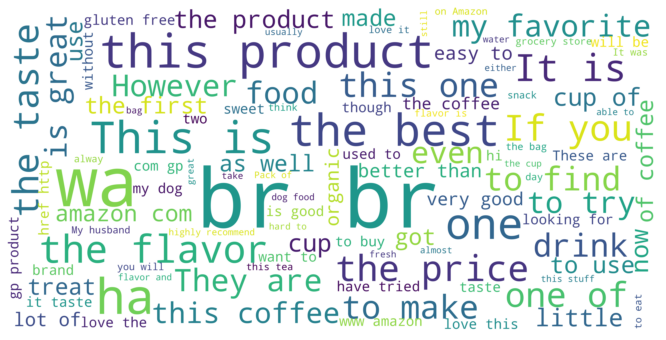

In [14]:
word_cloud_text = ''.join(amazon_reviews['Text'])

wordcloud = WordCloud(max_font_size=100,
            max_words=100,
            background_color="white",
            scale = 10,
            width=800,
            height=400
            ).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
# Scale - Scaling between computation and drawing
# interpolation-bilinear - to make the displayed image appear more smoothly 

Standardizing the rating for sentiment analysis

Rating of 4 or 5 will get mapped to 1 and will be related to positive reviews


Rating of 1 or 2 will get mapped to 0 and will be realted to negative reviews


Ratings of 3 will get removed since they will represent neutral reviews

In [15]:
# Mapping the ratings
# Score greater than 3 will be = to 1 and score< 3 will be equal to 0
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3,1,0)

# Removing neutral reviews
amazon_reviews = amazon_reviews[amazon_reviews.Score !=3]

# Printing the counts of each class
amazon_reviews['Sentiment_rating'].value_counts()

1    7616
0    1522
Name: Sentiment_rating, dtype: int64

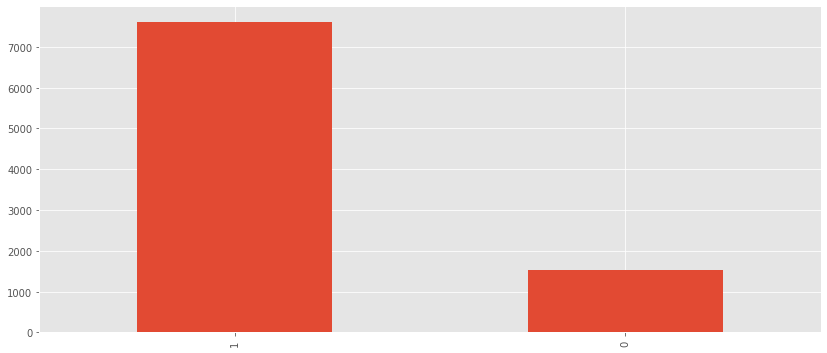

In [16]:
amazon_reviews.Sentiment_rating.value_counts().plot.bar()
plt.show()

### Pre-processing
1. Converting words to lower-case/ uper-case

2. Reoving Special Characetrs(High/Low Frequency words)

3. Removing stopwords(common words)

4. Stemming/Lemmatization

In [17]:
# 1.Converting words to lower case
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()
amazon_reviews['reviews_text_new']

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say, the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old... he had gas and constip...
Name: reviews_text_new, Length: 9138, dtype: object

In [18]:
from nltk import word_tokenize

# Word tokenize example
word_tokenize("DPhi Bootcamp rules. It is awesome :D")

['DPhi', 'Bootcamp', 'rules', '.', 'It', 'is', 'awesome', ':', 'D']

In [19]:
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens_lower = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

# The number of tokens have gone by 18% by normalizing the corpus REDO IT AGAIN you will be right

Number of unique tokens then:  27884
Number of unique tokens now:  27884


### Removing Special Charcters

In [20]:
### Selecting non alpha numeric characters that are not spaces -in characters if not characters,numerical, " ",thn its spcl char 
spl_chars = amazon_reviews['reviews_text_new'].apply(lambda review:
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])
# Getting a list of list into a single digit(list of all charcters in spc chars)
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special charactes
set(flat_list)


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [21]:
# Lets remove these special characters

#review_backup = amazon_reviews['reviews_text_new'].copy()
# IN THE STRING WE WILL CONSIDER ONLY REG(r) expressions that have regular A-Z AND a-z and (, ,space) rest we will reject

#amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+','')

#amazon_reviews['reviews_text_new']

In [22]:
import re
import string

def text_clean_1(text):
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[''""....]','',text)
    
    return text

cleaned = lambda x: text_clean_1(x)

In [23]:
# Starts from here
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [25]:
amazon_reviews['reviews_text_new1'] = amazon_reviews['reviews_text_new'].apply(lambda x:remove_punctuation(x))
amazon_reviews['reviews_text_new1']

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price  there was a wide...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say the organic formula c...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old he had gas and constipati...
Name: reviews_text_new1, Length: 9138, dtype: object

In [26]:
amazon_reviews['reviews_text_new1'] = pd.DataFrame(amazon_reviews['reviews_text_new'].apply(cleaned))
amazon_reviews['reviews_text_new1'].head(10)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price  there was a wide...
5    i got a wild hair for taffy and ordered this f...
6    this saltwater taffy had great flavors and was...
7    this taffy is so good  it is very soft and che...
8    right now im mostly just sprouting this so my ...
9    this is a very healthy dog food good for their...
Name: reviews_text_new1, dtype: object

In [27]:
#bad_chars = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', ']', '^','_', '`','{','}','~','§','®'] 

In [28]:
# After the removal of special characters
print("-Old Review-")
print(amazon_reviews['Text'][6])
print("\n-New Review-")
print(amazon_reviews['reviews_text_new1'][6])

-Old Review-
This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!

-New Review-
this saltwater taffy had great flavors and was very soft and chewy  each candy was individually wrapped well  none of the candies were stuck together which did happen in the expensive version fralingers  would highly recommend this candy  i served it at a beachthemed party and everyone loved it


### stop words - high frequency words

In [29]:
from nltk.corpus import stopwords

print('Available Languages')
print(stopwords.fileids())

Available Languages
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [30]:
# Reviewing the english stopwords in stopwords
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# Example of removing stopwords:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []

# we will be focusing on sentence 0
sentence = amazon_reviews['reviews_text_new1'][0]
words = nltk.word_tokenize(sentence)


for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)
        
print('---Original Sentence -----',sentence)

print('\n---Stowords in the sentence ---\n',stopword)

print('---Non- Stopwordsin the sentence---',without_stop_words)

# 1st Original sentence
# 2nd taking all the words which match with stop_words directory(english) with that of sentence-0 (-\n) is for the spacing
# 3rd - Non-stopwords- words in sentence 0 which do not belong int he stopwords(english) directory 

---Original Sentence ----- i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most

---Stowords in the sentence ---
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']
---Non- Stopwordsin the sentence--- ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


### Let's ommit certain stopwords from our review

In [36]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_reviews['reviews_text_nonstop'] = amazon_reviews['reviews_text_new1'].apply(lambda row: stopwords_removal(stop_words, row))
amazon_reviews[['reviews_text_new1','reviews_text_nonstop']]

,reviews_text_new1,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wide...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula c...,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


### 4. Stemming & lemmatization
Now we are ready for the last part of our pre-processing - stemming & lemmatization.

Different forms of a word often communicate essentially the same meaning. For example, there’s probably no difference in intent between a search for shoe and a search for shoes. The same word may also appear in different tenses; e.g. "run", "ran", and "running". These syntactic differences between word forms are called inflections. In general, we probably want to treat inflections identically when extracting features from the text.

Sometimes this process is nearly-reversible and quite safe (e.g. replacing verbs with their infinitive, so that "run", "runs", and "running" all become "run"). Other times it is a bit dangerous and context-dependant (e.g. replacing superlatives with their base form, so that "good", "better", and "best" all become "good"). The more aggressive you are, the greater the potential rewards and risks. For a very aggressive example, you might choose to replace "Zeus" and "Jupiter" with "Zeus" only; this might be OK if you are summarizing myths, confusing if you are working on astronomy, and disastrous if you are working on comparative mythology.

We won't get into the details of the differences between stemming, lemmatization and other types of text normalization here. Please review the following resource for detailed explanation: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html.

Stemming works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found.

Lemmatization takes into consideration the morphological analysis of the words. So lemmatization considers the grammar of the word and tries to find the root word instead of just getting to the root word by brute force methods.

In [37]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Taking an example to find the difference btw Lancaster and porter Stemmer for (trouble, troubling , troubled)
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [40]:
### Building a machine learning model -SUPERVISED ML MODEL
amazon_reviews[['Text','Score','Sentiment_rating']].head(5)


,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


n-grams
Since 1-grams are sometimes insufficient to understand the significance of certain words in our text, it is natural to consider blocks of words, or n-grams.

The simplest version of the n-gram model, for $n &gt; 1$, is the bigram model, which looks at pairs of consecutive words. For example, the sentence "The quick brown fox jumps over the lazy dog" would have tokens "the quick", "quick brown",..., "lazy dog". The following image (source: http://recognize-speech.com/language-model/n-gram-model/comparison) explains this concept:



This has obvious advantages and disadvantages over looking at words individually:

Advantages:
Retains the structure of the overall document, and
Paves the way for analyzing words in context

Disadvantages:
The dimension is vastly larger
In practice, this last challenge can be truly daunting. As an example, War and Peace has 3 million characters, which translates to several hundred thousand 1-grams (words). If you consider that the set of all possible bigrams can be as large as the square of the number of 1-grams, this gets us to a hundred billion possible bigrams! If classical ML techniques are not suitable for training on 3 million characters, how can they possibly deal with a hundred billion dimensions?

For this reason, it is often prudent to start by extracting as much value out of 1-grams as possible, before working our way up to more complex structures.

Let's look at an example of extracting n-grams over a proposed sentence:

### Example of n- grams
  sentence - : " This a sentence "
  
  1-grams  - " This | is  | a | sentence
  
  2-grams  - " This is | is a | a sentence 

In [41]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


### Bag of words

###    We give a matrix - to every word asscoiated

In [44]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(amazon_reviews['reviews_text_new1'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

# Its sparce matrix - where its shoen the 0 row(sentence) - aa has been observed 0 times

,aa,aaaa,aahhhs,ab,aback,abandon,abates,abberline,abbott,abby,...,zotz,zridge,zs,zucchini,zucchinibr,zukebr,zukes,zupas,zuppa,îts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# The above is very complex process with 22145 columns actually becoming quite cumbersome
#Let's use this to create a bag of words from the reviews, excluding the noise words we identified earlier:
# Count Vectorizer - setting a vaector for words based on the counts(frequency) it recieved

In [48]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(amazon_reviews['reviews_text_new1'])

In [50]:
bow_data
# its a sparce matrix containing data for bag_of _words

<9138x22179 sparse matrix of type '<class 'numpy.int64'>'
	with 478260 stored elements in Compressed Sparse Row format>

### We can see that a sparse matrix of 9138 observations (number of rows of the reviews_text_new series) has been built, and 22179 columns corresponding to the features extracted by means of the representation of the 1-gram count of the user reviews.

Once the bag of words is prepared, the dataset should be divided into training and test sets:

In [51]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    amazon_reviews['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [53]:
y_test_bow.value_counts()/y_test_bow.shape[0]
# So basically we expect our model to bring 84% accuracy which is about to get tested

1    0.847921
0    0.152079
Name: Sentiment_rating, dtype: float64

## The test data contains 84% positive sentiment reviews. So, if we were to naively classify all reviews as positive, then our model would achieve an accuracy of 84%. Therefore, this is the baseline that any model we create must beat. We have an imbalance in the classes. However, we will skip the handling class imbalance processes to focus on NLP modeling. However, as an intermediate step, techniques such as SMOTE, sub-sampling or oversampling can be applied.

### APPLYING LOGISTIC REGRESSION

In [54]:
# Let's train the model on our training data and run the resulting model on our test data
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9547193877551019


In [55]:
# Since accuracy is very high , we need to make some  changes
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(amazon_reviews.reviews_text_new)

In [56]:
# Notice the increase in features with inclusion of n-grams
bow_data

<9138x1333678 sparse matrix of type '<class 'numpy.int64'>'
	with 2821717 stored elements in Compressed Sparse Row format>

In [57]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    amazon_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [58]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9552145317882869


##### The F1-score has jumped slightly. This is an example of what simple hyperparameter tuning and input feature modification can do to the overall performance. We can even get interpretable features from this in terms of what contributed the most to positive and negative sentiment:

In [60]:
# Checking the weight of words
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
552045,great,1.250803
414580,delicious,0.824957
542936,good,0.787589
1102543,the best,0.784023
911211,perfect,0.783786
465122,excellent,0.757290
738243,love,0.750125
812272,nice,0.739104
296053,best,0.738234
741496,loves,0.595775


In [61]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews

,words,weights
271020,awful,-0.516869
425637,disappointing,-0.537259
1046158,stick,-0.538954
1314306,worst,-0.539281
1267017,waste,-0.544489
270125,away,-0.546352
1279041,were,-0.556216
798626,n't,-0.641996
273344,bad,-0.646247
1274538,weak,-0.695767


#### TF-IDF model
Of course, bag-of-words are not the only way to featurize text. Another method is the Term Frequency-Inverse Document Frequency (TF-IDF) method. This evaluates how important a word is to a document within a large collection of documents (i.e. corpus). The importance increases proportionally based on the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The TF-IDF weight is the product of two terms. The first computes the normalized Term Frequency (TF); i.e. the number of times a word appears in a document divided by the total number of words in that document. The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears:

Let's re-featurize our original set of reviews based on TF-IDF and split the resulting features into train and test sets:

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(amazon_reviews['reviews_text_new1'])

In [65]:
tfidf_data

<9138x22179 sparse matrix of type '<class 'numpy.float64'>'
	with 478260 stored elements in Compressed Sparse Row format>

In [66]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            amazon_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

#### Applying logistic regression to TF-IDF features
Let's apply logistic regression to the features created from TF-IDF:

In [67]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9379939209726443


### Here we have decresed slightly our F1 score value with TF-IDF as compared to the bag-of-words approach.

###Word embeddings model

The final type of featurization we will cover are word embeddings. This is a type of word representation that allows words with similar meaning to have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems. It is capable of capturing the context of a word in a document, its semantic and syntactic similarity, and its relation with other words. Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space.

In the following image, each of the words have been represented in 2-dimensions for simplicity. It can be clearly seen that words with similar context are grouped together – bathroom, kitchen, bathtub are grouped together, while microwave, refrigerator, oven form another group, etc.